# Initial EDA On Vehicle Dataset
https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
car = pd.read_csv('/Users/yaoruofan/Downloads/vehicles.csv')
car.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
car = car.drop(['id','url','region_url','image_url','county'], axis = 1)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  description   426810 non-null  object 
 17  state         426880 non-null  object 
 18  lat 

### Data Overview

In [ ]:
for column in car.columns:
    uniques = car[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

region                 404	 ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro']
price                15655	 [ 6000 11900 21000  1500  4900]
year                   115	 [  nan 2014. 2010. 2020. 2017.]
manufacturer            43	 [nan 'gmc' 'chevrolet' 'toyota' 'ford']
model                29668	 [nan 'sierra 1500 crew cab slt' 'silverado 1500' 'silverado 1500 crew'
 'tundra double cab sr']
condition                7	 [nan 'good' 'excellent' 'fair' 'like new']
cylinders                9	 [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders']
fuel                     6	 [nan 'gas' 'other' 'diesel' 'hybrid']
odometer             104871	 [   nan 57923. 71229. 19160. 41124.]
title_status             7	 [nan 'clean' 'rebuilt' 'lien' 'salvage']
transmission             4	 [nan 'other' 'automatic' 'manual']
VIN                  118265	 [nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805' '3GCPWCED5LG130317'
 '5TFRM5F17HX120972']
drive                    4	 [nan 'rwd

In [ ]:
# Drop VIN, size, region??

(array([4.26869e+05, 0.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([0.00000000e+00, 3.73692871e+08, 7.47385742e+08, 1.12107861e+09,
        1.49477148e+09, 1.86846436e+09, 2.24215723e+09, 2.61585010e+09,
        2.98954297e+09, 3.36323584e+09, 3.73692871e+09]),
 <BarContainer object of 10 artists>)

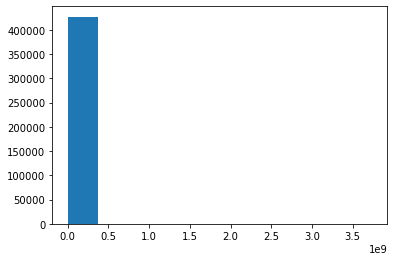

In [ ]:
#sns.set()
#sns.histplot(car['price'])
plt.hist(car['price'])

In [ ]:
car.describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [ ]:
car[car['price'] == 0] ## should drop

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
466,birmingham,0.0,2012.0,ford,f250 super duty,NaN,NaN,gas,0.582614,clean,...,NaN,4wd,NaN,NaN,NaN,SOUTHERN TRUCKS!! Huge Selection of Work and U...,al,35.250700,-87.352600,2021-04-28T15:16:22-0500
975,birmingham,0.0,2002.0,nissan,maxima,NaN,NaN,gas,0.587123,clean,...,NaN,NaN,NaN,NaN,black,"$3,300 Selling a 2002 Nissan Maxima with 3.6L ...",al,33.649300,-86.705700,2021-04-20T19:09:54-0500
1009,birmingham,0.0,2003.0,cadillac,escalade esv,NaN,NaN,gas,0.594915,clean,...,NaN,NaN,NaN,NaN,NaN,"2003 Cadillac Escalade ESV: AWD, Vortec 6.0 L ...",al,33.923249,-87.627811,2021-04-19T23:48:32-0500
1555,birmingham,0.0,1999.0,NaN,"1999 ply,prowler",good,8 cylinders,gas,0.471290,salvage,...,NaN,rwd,compact,convertible,black,"Custom,prowler.ls1,4l60.9”Ford 350 gears with ...",al,33.739200,-86.772600,2021-04-08T18:37:11-0500
1754,birmingham,0.0,2005.0,gmc,envoy,excellent,8 cylinders,gas,0.585792,clean,...,NaN,4wd,full-size,SUV,white,"Clean 2005 GMC Envoy $5,500 show contact info",al,33.505374,-86.852645,2021-04-05T11:16:20-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423876,milwaukee,0.0,2008.0,buick,lacrosse premium,good,6 cylinders,gas,0.527669,clean,...,NaN,fwd,mid-size,sedan,silver,We buy junk cars and trucks we pay best price ...,wi,42.716100,-87.823300,2021-04-23T13:33:04-0500
424893,milwaukee,0.0,1970.0,chevrolet,nova ss,NaN,8 cylinders,gas,0.497294,clean,...,NaN,rwd,full-size,coupe,green,1970 Nova GM 502 block V8 3140 Crank Blueprint...,wi,43.303400,-88.002900,2021-04-15T18:54:25-0500
425626,wausau,0.0,2012.0,chevrolet,express,excellent,8 cylinders,gas,0.398739,clean,...,NaN,4wd,full-size,van,NaN,Now Available Online and on our lot at Goodguy...,wi,45.549700,-94.224500,2021-05-03T09:25:20-0500
425627,wausau,0.0,2012.0,chevrolet,express,excellent,8 cylinders,gas,0.000000,clean,...,NaN,NaN,full-size,van,white,Now Available Online and on our lot at Goodguy...,wi,45.549700,-94.224500,2021-05-03T09:06:18-0500


In [ ]:
car.shape

(426880, 21)

(array([4.21841e+05, 3.87000e+02, 4.70000e+01, 8.00000e+00, 1.00000e+01,
        1.50000e+01, 2.00000e+00, 1.80000e+01, 8.00000e+00, 1.44000e+02]),
 array([       0.,  1000000.,  2000000.,  3000000.,  4000000.,  5000000.,
         6000000.,  7000000.,  8000000.,  9000000., 10000000.]),
 <BarContainer object of 10 artists>)

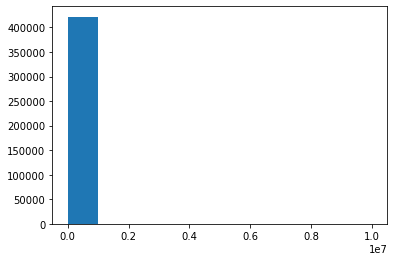

In [ ]:
plt.hist(car['odometer'])

#### The data are highly skewed, try to do Log transformation and convert to normal distribution.

In [ ]:
logtrans = ['odometer', 'price']
for c in logtrans:
    car[c] = np.log(car[c]+1)

(array([1.9510e+03, 1.3000e+01, 2.9000e+01, 9.7000e+01, 1.6200e+02,
        2.9600e+03, 1.7128e+04, 3.6085e+05, 1.0763e+04, 3.2000e+01]),
 array([0.        , 0.07051638, 0.14103277, 0.21154915, 0.28206554,
        0.35258192, 0.4230983 , 0.49361469, 0.56413107, 0.63464746,
        0.70516384]),
 <BarContainer object of 10 artists>)

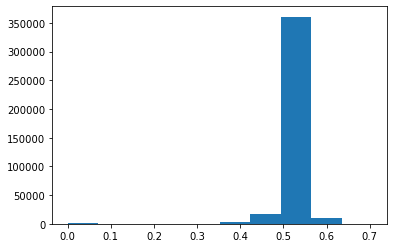

In [ ]:
plt.hist(car['price'])

(array([2.24600e+03, 1.53000e+02, 1.96000e+02, 3.70000e+02, 9.33000e+02,
        6.65000e+02, 2.90800e+03, 9.62800e+03, 2.75889e+05, 1.27527e+05]),
 array([0.        , 0.06434789, 0.12869577, 0.19304366, 0.25739155,
        0.32173944, 0.38608732, 0.45043521, 0.5147831 , 0.57913099,
        0.64347887]),
 <BarContainer object of 10 artists>)

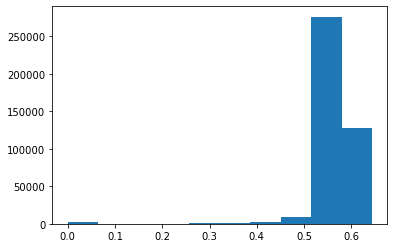

In [ ]:
plt.hist(car['odometer'])

### EDA of Categorical Variables

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

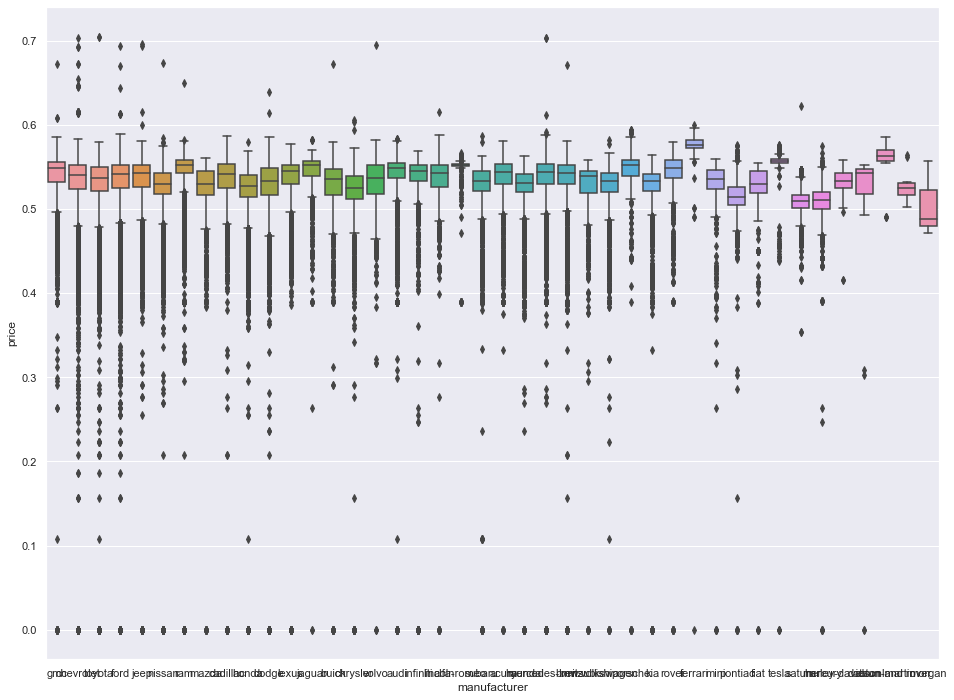

In [ ]:
plt.figure(figsize=(16,12))
sns.set()
sns.boxplot(data=car, x='manufacturer', y='price')

In [ ]:
car['price'].groupby(car['manufacturer']).mean().sort_values(ascending=False)

manufacturer
ferrari            0.566862
aston-martin       0.553251
tesla              0.551726
alfa-romeo         0.549693
ram                0.544098
porsche            0.543759
jaguar             0.543395
gmc                0.540656
audi               0.540210
rover              0.540025
infiniti           0.536916
acura              0.536493
lincoln            0.536141
lexus              0.535109
ford               0.534871
cadillac           0.533673
bmw                0.532776
chevrolet          0.532456
harley-davidson    0.532209
volvo              0.532146
jeep               0.532013
mercedes-benz      0.531953
mini               0.530718
toyota             0.530300
land rover         0.527912
subaru             0.527813
buick              0.527757
mitsubishi         0.527521
volkswagen         0.526030
mazda              0.525839
kia                0.525109
hyundai            0.524850
nissan             0.524123
honda              0.523274
fiat               0.523052
dodge  

<AxesSubplot:xlabel='condition', ylabel='price'>

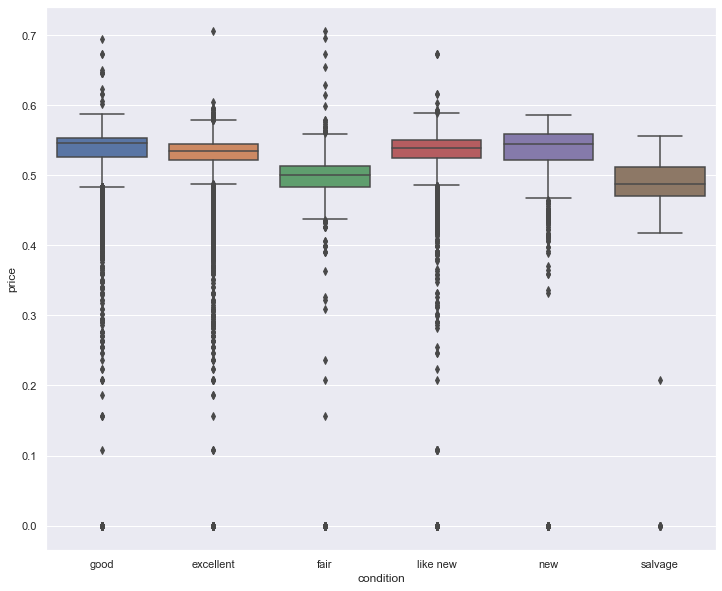

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='condition', y='price')

**Condition might be an important factor that has impact on prices.**

<AxesSubplot:xlabel='cylinders', ylabel='price'>

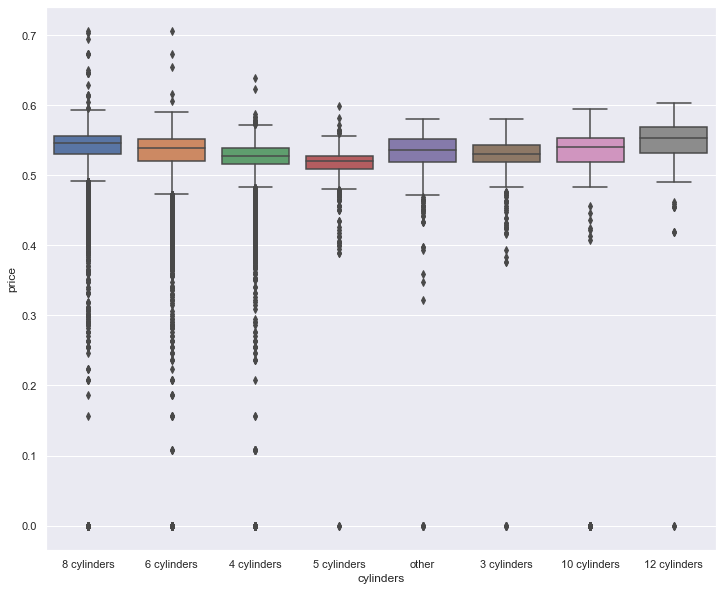

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='cylinders', y='price')

**Cylinders might be an important factor that has impact on prices.**

<AxesSubplot:xlabel='fuel', ylabel='price'>

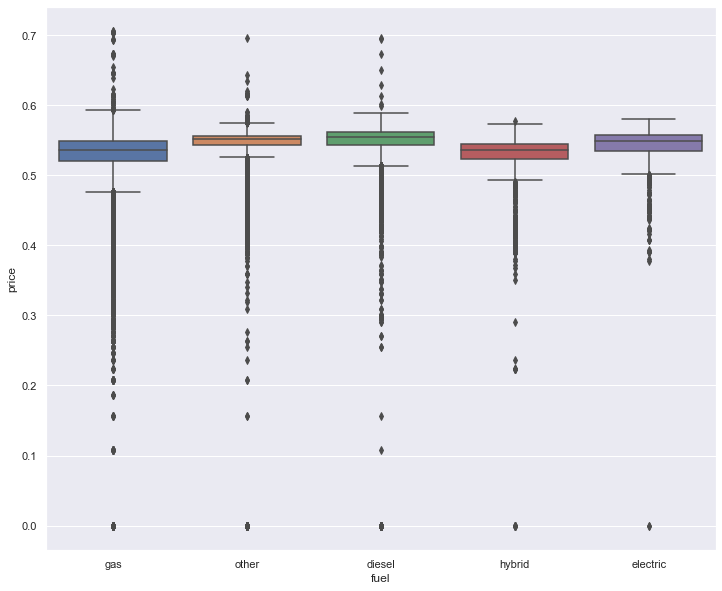

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='fuel', y='price')

<AxesSubplot:xlabel='title_status', ylabel='price'>

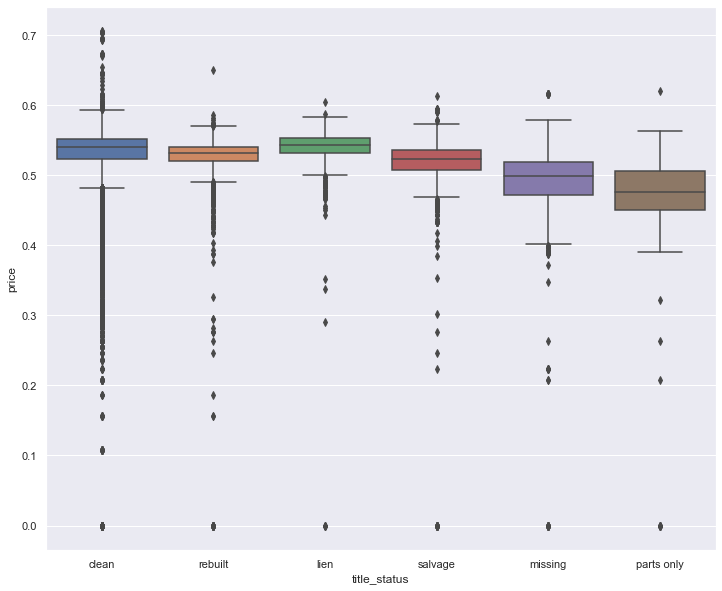

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='title_status', y='price')

**Title_status might be an important factor that has impact on prices.**

<AxesSubplot:xlabel='transmission', ylabel='price'>

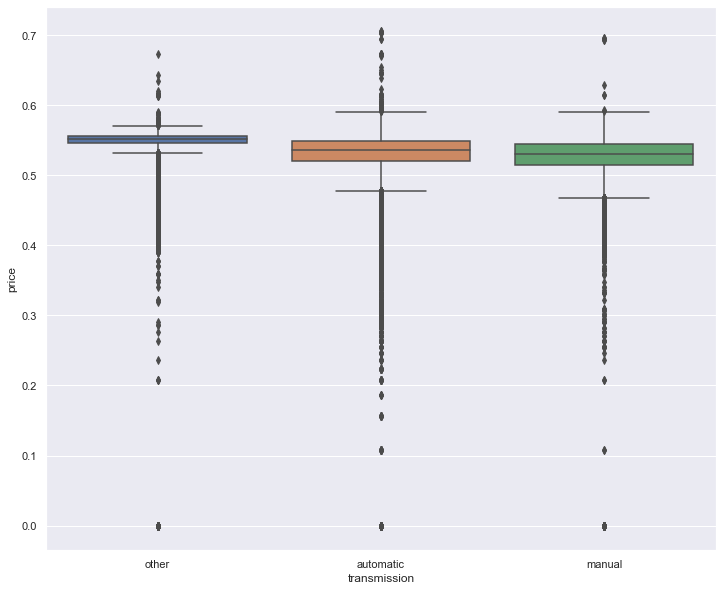

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='transmission', y='price')

<AxesSubplot:xlabel='drive', ylabel='price'>

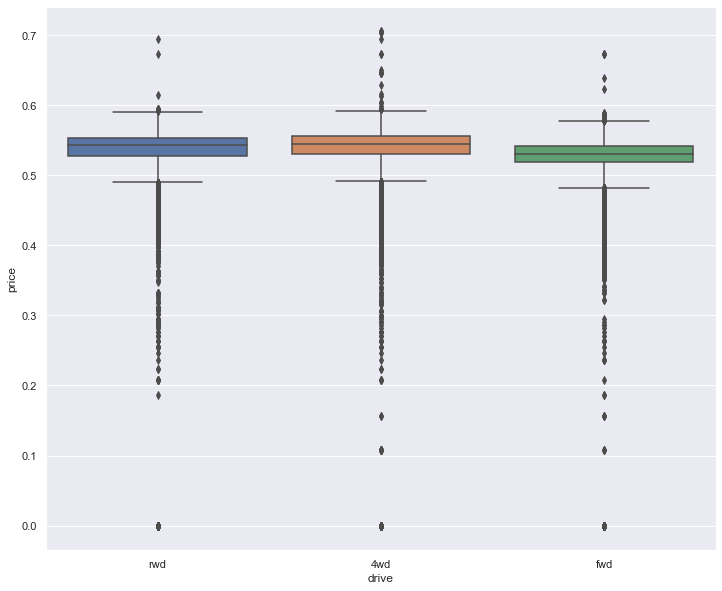

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='drive', y='price')

<AxesSubplot:xlabel='type', ylabel='price'>

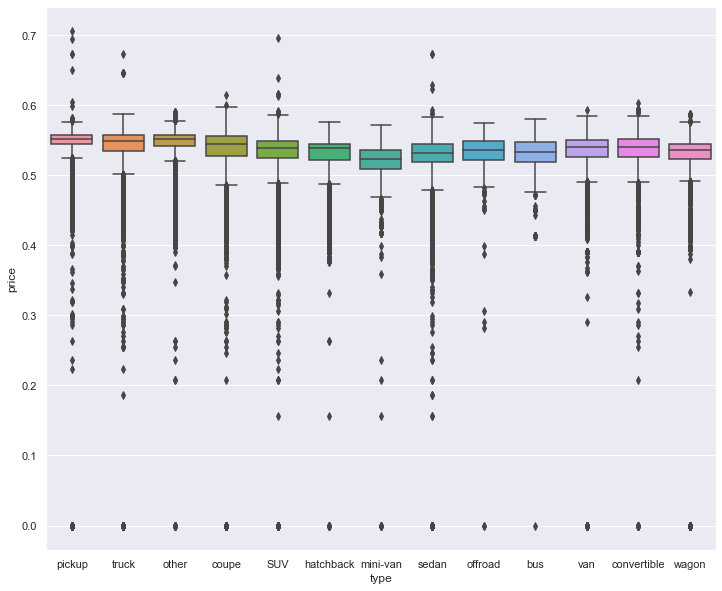

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='type', y='price')

**Type might be an important factor that has impact on prices.**

<AxesSubplot:xlabel='paint_color', ylabel='price'>

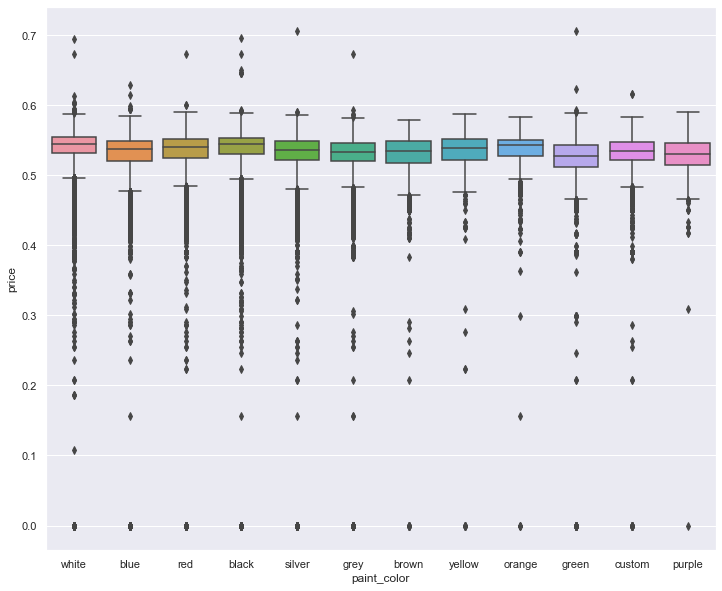

In [ ]:
plt.figure(figsize=(12,10))
sns.set()
sns.boxplot(data=car, x='paint_color', y='price')

In [ ]:
car['price'].groupby(car['state']).mean().sort_values(ascending=False)

state
wv    0.543521
ak    0.542122
wy    0.540868
ut    0.540650
mt    0.540149
mo    0.539025
nd    0.538985
sc    0.538599
tn    0.537759
ok    0.537529
ky    0.537452
nv    0.537452
al    0.537440
ar    0.536636
ga    0.536587
la    0.536474
in    0.536125
ks    0.536093
nc    0.535815
co    0.535389
az    0.535351
sd    0.535170
wa    0.535032
ia    0.533851
ne    0.533671
tx    0.533425
md    0.533164
id    0.533108
ny    0.532893
va    0.532262
ca    0.532040
dc    0.531778
nm    0.531462
wi    0.531063
hi    0.530798
pa    0.530794
ri    0.530777
ms    0.530758
mn    0.530581
de    0.529321
mi    0.529215
vt    0.528883
nj    0.528853
il    0.528822
oh    0.528566
ct    0.527770
ma    0.525528
or    0.523849
nh    0.522152
me    0.514689
fl    0.514453
Name: price, dtype: float64